### How to compare small images quickly?
we'll try to see different ways to do this :-)

In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import platform; print platform.python_version()
print np.__version__,',', matplotlib.__version__

2.7.11
1.10.4 , 1.5.1


We'll build n = 2000 images, n1 original images, and we'll stack n2 images which are repeated

In [38]:
n = 2000
n1 = 1500
n2 = 500

In [39]:
myarr = np.random.rand(n1,28,28)
rand_idx = np.random.randint(n1, size = n2)
print rand_idx
for k in rand_idx:
    img = np.multiply(myarr[k,:,:],np.ones((1,28,28)))
    #print img.shape,myarr.shape
    myarr = np.vstack((myarr,img))
print myarr.shape

[1051 1120  768  108 1404  858 1332 1091  183 1215  510   84  798  489  308
   30  817  147 1107 1072  147   68  514 1288  493 1362  581  862  757  412
  357  451 1231  114 1132    0 1003   46 1439  465  811  837 1320 1213  296
  680 1491  549  664 1056  151  864  361 1492  926 1419  114  943  329 1435
  655  753  852   81  780  166  475 1297 1145  897 1046 1216  322  149 1102
  587  801 1238  825  201 1356  482 1158 1002  873  774  494  430 1129   14
 1267 1040  880  219  407   94  319   39  952   81  175  966  252 1267 1196
 1268 1469  773 1293 1037  660  638  368 1291 1138  258 1373  190  670  904
  111  275 1193 1120  229   29  531  305  476 1048  877  871 1479  956  984
  672  338  696  251   99 1373 1206 1214  257 1101 1111  354 1267  959 1392
 1011  292 1404 1048 1211  362 1244  352  162 1487  767 1097  279  222 1070
 1045  544 1392  806 1221  771 1024 1070  702 1354 1321  917  197  852   75
  325 1363 1220   86  354 1235  259  316 1226  428  310  599  703  669   63
  390 1387  

How are the repeated images distributed?

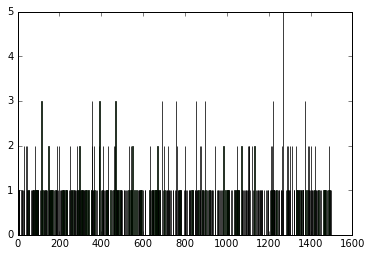

In [40]:
plt.hist(rand_idx, n1-1, facecolor='green', alpha=0.75);

In [41]:
myarr[rand_idx[-1],0,:]

array([ 0.68361041,  0.02740142,  0.13246831,  0.94838054,  0.58269896,
        0.64796919,  0.84251099,  0.42507798,  0.59084769,  0.09881576,
        0.30302398,  0.52096907,  0.14094668,  0.20844201,  0.1221772 ,
        0.20214162,  0.29145841,  0.08931281,  0.19686671,  0.0900719 ,
        0.38998372,  0.7676181 ,  0.49798769,  0.89142609,  0.80726279,
        0.67115542,  0.66574221,  0.49901874])

In [42]:
myarr[1999,0,:]

array([ 0.68361041,  0.02740142,  0.13246831,  0.94838054,  0.58269896,
        0.64796919,  0.84251099,  0.42507798,  0.59084769,  0.09881576,
        0.30302398,  0.52096907,  0.14094668,  0.20844201,  0.1221772 ,
        0.20214162,  0.29145841,  0.08931281,  0.19686671,  0.0900719 ,
        0.38998372,  0.7676181 ,  0.49798769,  0.89142609,  0.80726279,
        0.67115542,  0.66574221,  0.49901874])

There is an array_equal numpy function, and we can be sure that it works with the help of np.imshow()

In [43]:
np.array_equal(myarr[rand_idx[-1],:,:],myarr[1999,:,:])

True

Convince yourself that the following are exactly the same images :-)

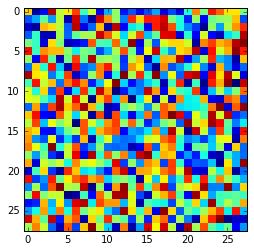

In [44]:
plt.figure()
plt.imshow(myarr[rand_idx[-1],:,:],interpolation='nearest')

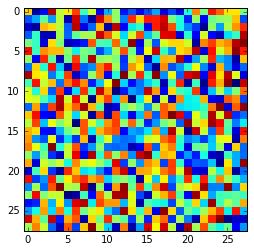

In [45]:
plt.figure()
plt.imshow(myarr[1999,:,:],interpolation='nearest')

## Now let's see the times spent:
_____

**Version 1**: built-it function

In [78]:
%%time

count = 0
for i in range(n):
    for j in range(i+1,n):
        if np.array_equal( myarr[i,:,:],myarr[j,:,:]):            
            count +=1

CPU times: user 14.8 s, sys: 25.3 ms, total: 14.9 s
Wall time: 14.9 s


In [79]:
print count

590


**Version 2**: what about doing a first check: let's compare one pixel

In [80]:
%%time
count = 0
for i in range(n):
    for j in range(i+1,n):
        if myarr[i,0,0] ==myarr[j,0,0]:
            if np.array_equal( myarr[i,:,:],myarr[j,:,:]):
                count +=1

CPU times: user 1.02 s, sys: 7.63 ms, total: 1.03 s
Wall time: 1.03 s


In [81]:
print count

590


**Version 3**: what if we try to compare to a zero vector?

In [50]:
%%time

count = 0
v = np.zeros((28,28))
for i in range(n):
    for j in range(i+1,n):
           if np.array_equal(myarr[i,:,:]-myarr[j,:,:], v):
                count +=1

CPU times: user 19.4 s, sys: 45.1 ms, total: 19.4 s
Wall time: 19.5 s


In [75]:
print count

1999000


**Version 4: **
    what if we try to compare vectorized versions of the vector?

In [82]:
%%time
count = 0
for i in range(n):
    for j in range(i+1,n):
           if np.array_equal(myarr[i,:,:].ravel(),myarr[j,:,:].ravel()):
                count +=1

CPU times: user 15 s, sys: 23.1 ms, total: 15 s
Wall time: 15 s


In [83]:
print count

590


**version 5:** if we select the python built-in version that checks for floating point errors, it's waaaayy longer

In [54]:
%%time
count = 0
v = np.zeros((28,28))
for i in range(n):
    for j in range(i+1,n):
           if np.allclose(myarr[i,:,:],myarr[j,:,:]):
                count +=1

CPU times: user 1min 29s, sys: 144 ms, total: 1min 30s
Wall time: 1min 30s


In [73]:
print count

1999000


________
Now we try to build the array_equal function *from scratch*,  by checking the pixels one by one

In [56]:
def compare_line(n,myarr1,myarr2):
    for k in xrange(n):
        if not myarr1[k]==myarr2[k]:
            return False
    return True   
    
def compare_img(m,n,img1,img2):
    for k in xrange(m):
        if not compare_line(n,img1[k,:],img2[k,:]):
            return False
    return True    


Let's see if it works on basic arrays

In [57]:
compare_img(5,5,np.zeros((5,5)), np.ones((5,5)))

False

In [58]:
compare_img(10,10,np.zeros((10,10)),np.zeros((10,10)))

True

cool!
...

**version 6**: Let it run

In [84]:
%%time
count = 0

for i in range(n):
    for j in range(i+1,n):
        if compare_img(28,28,myarr[i,:,:],myarr[j,:,:]):
            count +=1

CPU times: user 5.19 s, sys: 13.3 ms, total: 5.21 s
Wall time: 5.2 s


In [85]:
print count

590


**version 7:**
    what if we both  vectorize and compare the pixels one at a time?

In [88]:
%%time
count = 0

for i in range(n):
    for j in range(i+1,n):
        if compare_line(784,myarr[i,:,:].ravel(),myarr[j,:,:].ravel()):
            count +=1

CPU times: user 4.45 s, sys: 61.6 ms, total: 4.52 s
Wall time: 4.47 s


In [89]:
print count

590


**version 8**
Hash technique:

In [63]:
%%time 

set_valid_dataset = set([hash(str(myarr[i,:,:])) for i in xrange(n)])

CPU times: user 28.9 s, sys: 113 ms, total: 29 s
Wall time: 29.1 s


In [64]:
len(set_valid_dataset)

1500

**version 9** Hashtrick + hexdigest!

In [65]:
from hashlib import md5

In [66]:
%%time 
set_valid_dataset_2 = set([ md5(myarr[i,:,:]).hexdigest()  for i in xrange(n)])

CPU times: user 43.3 ms, sys: 760 µs, total: 44 ms
Wall time: 43.4 ms


In [90]:
len(set_valid_dataset_2)

1500

In [95]:
%%time
count = 0

for i in range(n):
    for j in range(i+1,n):
        if md5(myarr[i,:,:]).hexdigest()== md5(myarr[j,:,:]).hexdigest():
            count +=1

CPU times: user 1min 17s, sys: 123 ms, total: 1min 17s
Wall time: 1min 17s


In [96]:
print count

590
